In [1]:
### Imports and image loading

In [2]:
import math

from PIL import Image
import numpy as np
from scipy import ndimage

In [3]:
cam = Image.open('cameraman.tif', mode='r')
tire = Image.open('tire.tif', mode='r')
lena = Image.open('lena.tiff', mode='r')

### Make a darker Lena for testing MSE and PSNR

In [4]:
lena_arr = np.array(lena)
lena_dark = np.true_divide(lena_arr, 1.01)
lena_dark = Image.fromarray(np.uint8(lena_dark))

### Define MSE and PSNR

In [5]:
def MSE(im1, im2):
    assert im1.size == im2.size and im1.mode == im2.mode
  
    im1_data = np.array(im1, dtype=np.int32).flatten()
    im2_data = np.array(im2, dtype=np.int32).flatten()
    
    M = len(im1_data)
    
    MSE = np.power(np.subtract(im1_data, im2_data), 2).sum() / M
    return MSE

def PSNR(im1, im2):
    assert im1.size == im2.size and im1.mode == im2.mode
    mse = MSE(im1, im2)
    if mse == 0:
        return math.inf
    return 10 * math.log10(65025.0 / mse) # 255^2 = 65025

In [6]:
print("MSE: " + str(MSE(lena, lena_dark)))
print("PSNR: " + str(PSNR(lena, lena_dark)))

MSE: 3.64304351807
PSNR: 42.51616001719539


For convolutions:

```python
# Import relevant packages
import numpy as np
from scipy import ndimage
from PIL import Image

# Read in image - change filename to whatever you want
img = ndimage.imread('image.jpg')

# Create kernel
ker = (1/81.0)*np.ones((9,9))

# Convolve
out = ndimage.convolve(img, ker)

# Convert back to PIL image
out = Image.fromArray(out, 'RGB')

```

### Convolutions

In [11]:
h1 = (1/6) * np.ones((1,6))
h2 = np.transpose(h1)
h3 = np.array([[-1, 1]])
h1

array([[ 0.16666667,  0.16666667,  0.16666667,  0.16666667,  0.16666667,
         0.16666667]])

In [8]:
lena_greyscale = lena.convert(mode="L")
lena_greyscale_arr = np.array(lena_greyscale)

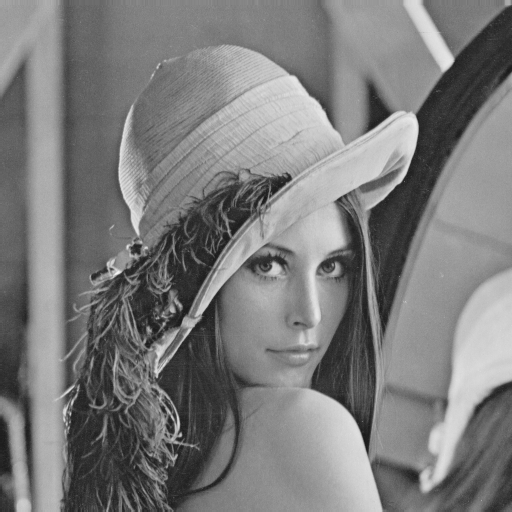

In [9]:
lena_greyscale

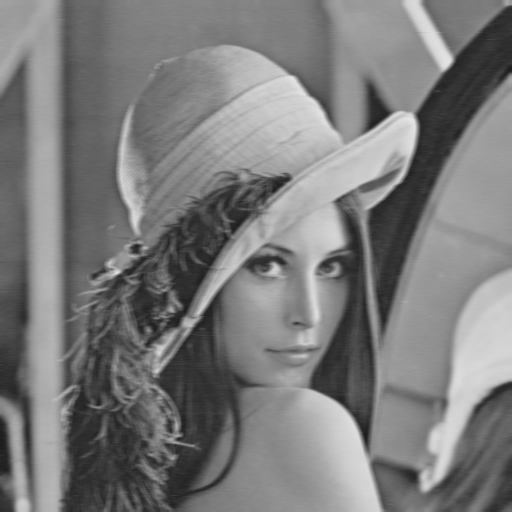

In [13]:
lena_greyscale_h1 = ndimage.convolve(lena_greyscale_arr, h1)
lena_greyscale_h1 = Image.fromarray(lena_greyscale_h1, 'L')
lena_greyscale_h1

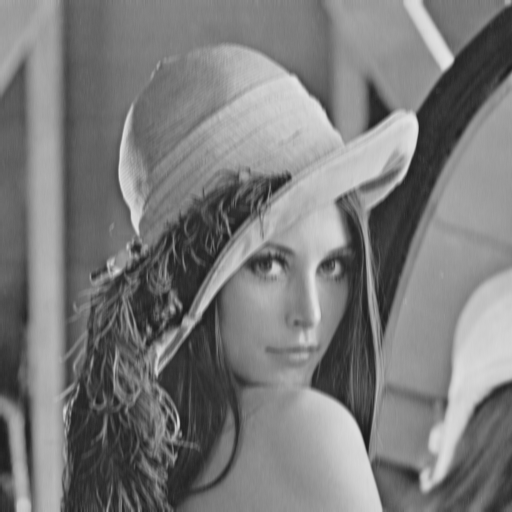

In [14]:
lena_greyscale_h2 = ndimage.convolve(lena_greyscale_arr, h2)
lena_greyscale_h2 = Image.fromarray(lena_greyscale_h2, 'L')
lena_greyscale_h2

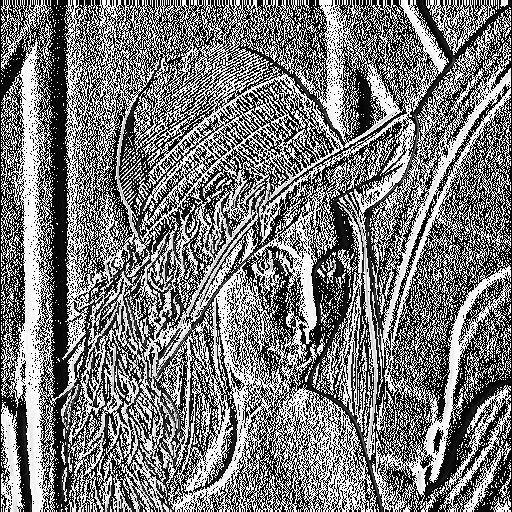

In [15]:
lena_greyscale_h3 = ndimage.convolve(lena_greyscale_arr, h3)
lena_greyscale_h3 = Image.fromarray(lena_greyscale_h3, 'L')
lena_greyscale_h3

# Section 2: Image Resizing

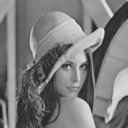

In [53]:
lena_grayscale = lena.convert(mode="L")
cam_grayscale = cam.convert(mode="L")
lena_size = np.int32(np.true_divide(lena_grayscale.size, 4))
cam_size = np.int32(np.true_divide(cam_grayscale.size, 4))
lena_downscale = lena_grayscale.resize(lena_size, resample=Image.BILINEAR)
cam_downscale = cam_grayscale.resize(cam_size, resample=Image.BILINEAR)
lena_downscale

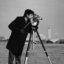

In [54]:
cam_downscale

Both images where reduced by a scale of 4 using Bi-Linear Interpolation. Resized and grayscaled images are shown above.

## Nearest Neighbour

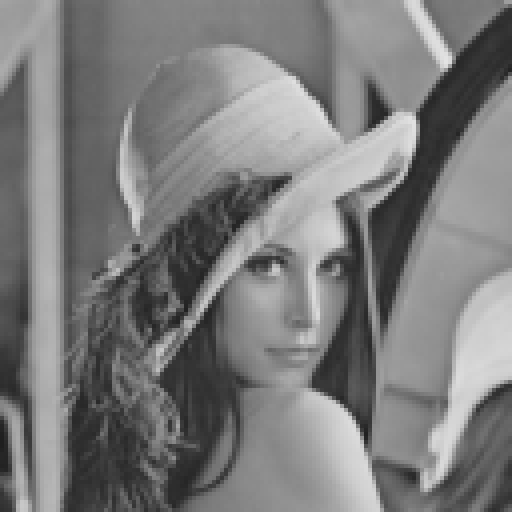

In [55]:
lena_nearest = lena_downscale.resize(lena_grayscale.size, resample=Image.NEAREST)
lena_nearest

In [56]:
print("MSE: " + str(MSE(lena_grayscale, lena_nearest)))
print("PSNR: " + str(PSNR(lena_grayscale, lena_nearest)))

MSE: 139.970748901
PSNR: 26.670430746041873


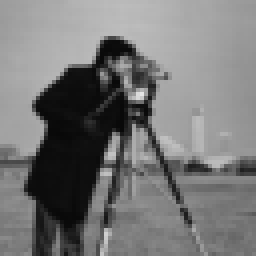

In [57]:
cam_nearest = cam_downscale.resize(cam_grayscale.size, resample=Image.NEAREST)
cam_nearest

In [58]:
print("MSE: " + str(MSE(cam_grayscale, cam_nearest)))
print("PSNR: " + str(PSNR(cam_grayscale, cam_nearest)))

MSE: 456.067169189
PSNR: 21.540515509664747


## Bilinear Interpolation

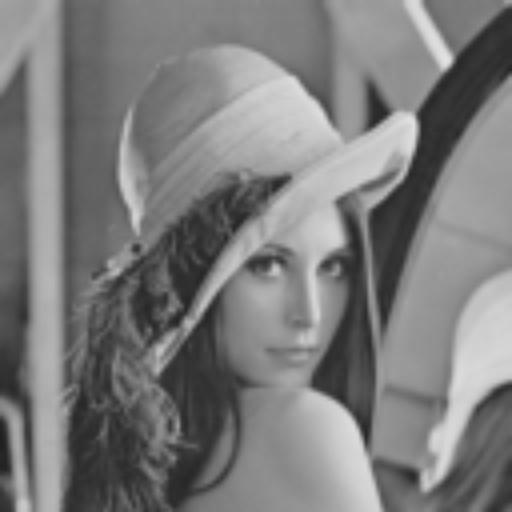

In [59]:
lena_bilinear = lena_downscale.resize(lena_grayscale.size, resample=Image.BILINEAR)
lena_bilinear

In [60]:
print("MSE: " + str(MSE(lena_grayscale, lena_bilinear)))
print("PSNR: " + str(PSNR(lena_grayscale, lena_bilinear)))

MSE: 121.232467651
PSNR: 27.294614156786675


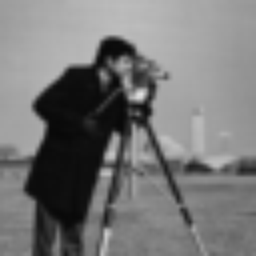

In [61]:
cam_bilinear = cam_downscale.resize(cam_grayscale.size, resample=Image.BILINEAR)
cam_bilinear

In [62]:
print("MSE: " + str(MSE(cam_grayscale, cam_bilinear)))
print("PSNR: " + str(PSNR(cam_grayscale, cam_bilinear)))

MSE: 427.630157471
PSNR: 21.820120357968378


## Bicubic Interpolation

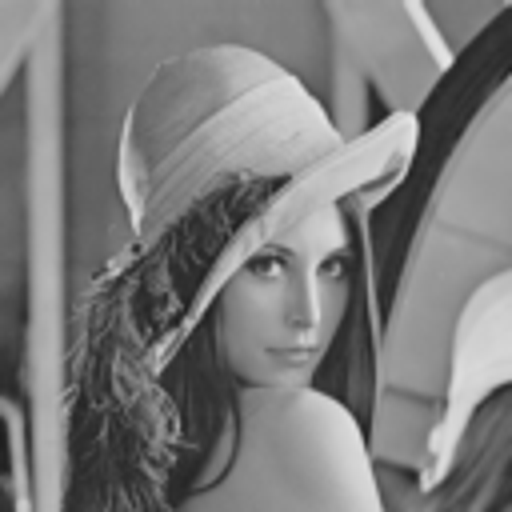

In [63]:
lena_bicubic = lena_downscale.resize(lena_grayscale.size, resample=Image.BICUBIC)
lena_bicubic

In [64]:
print("MSE: " + str(MSE(lena_grayscale, lena_bicubic)))
print("PSNR: " + str(PSNR(lena_grayscale, lena_bicubic)))

MSE: 101.099140167
PSNR: 28.08332898869516


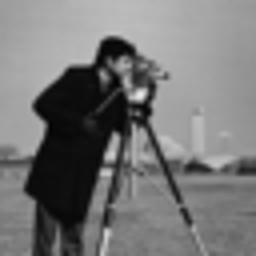

In [65]:
cam_bicubic = cam_downscale.resize(cam_grayscale.size, resample=Image.BICUBIC)
cam_bicubic

In [66]:
print("MSE: " + str(MSE(cam_grayscale, cam_bicubic)))
print("PSNR: " + str(PSNR(cam_grayscale, cam_bicubic)))

MSE: 385.782684326
PSNR: 22.2673763022557


## Questions - Section 2:
**1. What can you observe about the up-sampled image produced by each of the methods?**

**2. How do the different methods compare to each other in terms of PSNR as well as visual quality? Why?**

**3. What part of the image seems to work well using these digital zooming methods? What parts of the image doesn't? Why?**

**4. Compare the zooming results between Lena and Cameraman. Which image results in higher PSNR? Which image looks better when restored to original resolution using digital zoomming methods? Why?**